In [1]:
trec_to_learn = 7
random_seed = 100

In [2]:
import receive_data
import numpy as np

In [3]:
doc_ranks, queries, query_characteristics = receive_data.loadData(trec_to_learn)

Query :  351
Query :  352
Query :  353
Query :  354
Query :  355
Query :  356
Query :  357
Query :  358
Query :  359
Query :  360
Query :  361
Query :  362
Query :  363
Query :  364
Query :  365
Query :  366
Query :  367
Query :  368
Query :  369
Query :  370
Query :  371
Query :  372
Query :  373
Query :  374
Query :  375
Query :  376
Query :  377
Query :  378
Query :  379
Query :  380
Query :  381
Query :  382
Query :  383
Query :  384
Query :  385
Query :  386
Query :  387
Query :  388
Query :  389
Query :  390
Query :  391
Query :  392
Query :  393
Query :  394
Query :  395
Query :  396
Query :  397
Query :  398
Query :  399
Query :  400


In [4]:
# тут можно сделать разные сплиты

cut_size = 25

doc_ranks_test = doc_ranks[-cut_size:]
doc_ranks = doc_ranks[:-cut_size]

queries_test = queries[-cut_size:]
queries = queries[:-cut_size]

query_characteristics_test = query_characteristics[-cut_size:]
query_characteristics = query_characteristics[:-cut_size]

In [5]:
import numpy as np
np.random.seed(random_seed)

import matplotlib.pyplot as plt

import sys
import os
CUR_DIR = os.path.dirname(os.path.abspath("./")) + "/"

sys.path.append(CUR_DIR + 'genetic_algorithm')
import create_population
import learn_population

In [14]:
import primitive
import numpy as np

from get_quality import get_quality
from copy import deepcopy
from mutation import mutate_rand_tree
from crossover import crossfit
from create_population import create_random_model
from primitive import Primitives
import dill as pickle
import matplotlib.cm as cm

In [7]:
def vis(population, vals):
    plt.figure(figsize=(10, 5))
    plt.scatter(vals, [pop.get_tokens() for pop in population])
    plt.show()
    print ("!")

In [8]:
def rank_population(population, doc_ranks, queries, query_characteristics):   

    qualities = []
    for model in population:
        quality = get_quality(model, doc_ranks, queries, query_characteristics)
        qualities.append(quality)

    return qualities

In [9]:
from tqdm import tqdm_notebook as tqdm

In [17]:
from primitive import Primitive
from Levenshtein import distance as leven_dist

P = 10003
MOD = int(1e9 + 7)


def check_commutativity(primitive):
    if primitive.str in ["add", "multiply"]:
        if hash(primitive.nodes[0]) > hash(primitive.nodes[0]):
            primitive.nodes = primitive.nodes[::-1]


def list_nodes_with_hashes(primitive):
    ans = []
    hash_ = hash(primitive.str) % MOD

    check_commutativity(primitive)

    for node in primitive.nodes:
        list_nodes = list_nodes_with_hashes(node)
        hash_ *= P
        hash_ += list_nodes[-1][1]
        hash_ %= MOD
        ans += list_nodes

    ans.append((primitive, hash_))
    
    return ans


def compare(p1, p2):
    if p1.str != p2.str:
        return False

    check_commutativity(p1)
    check_commutativity(p2) 

    for l, r in zip(p1.nodes, p2.nodes):
        if not compare(l, r):
            return False

    return True


def get_first_structural_distance(p1, p2):

    nodes1 = list_nodes_with_hashes(p1)
    nodes2 = list_nodes_with_hashes(p2)
    
    max_same_part = 0
    
    for n1 in nodes1:
        for n2 in nodes2:
            if n1[1] == n2[1] and compare(n1[0], n2[0]):
                max_same_part = max(max_same_part, n1[0].get_tokens())

    return p1.get_tokens() + p2.get_tokens() - 2 * max_same_part


def get_second_structural_distance(p1, p2):
    w1 = p1.get_str_representation()
    w2 = p2.get_str_representation()
    return leven_dist(w1, w2)


In [10]:
# тут задается количество итераций
iterations = 4

/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:73: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:65: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])


HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

33


/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:41: RuntimeWarning: invalid value encountered in sqrt
  return self.func(*[node.calc(x, y) for node in self.nodes])


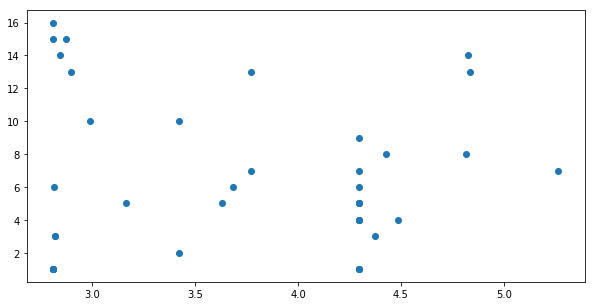

!
-5.265183398501728
40


/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:41: RuntimeWarning: divide by zero encountered in true_divide
  return self.func(*[node.calc(x, y) for node in self.nodes])
/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:41: RuntimeWarning: overflow encountered in exp
  return self.func(*[node.calc(x, y) for node in self.nodes])
/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:160: RuntimeWarning: invalid value encountered in log10
  LOG = Primitive(lambda x: np.log10(1+x), 1, DOMAINS.POSITIVE, DOMAINS.REAL, 'log')


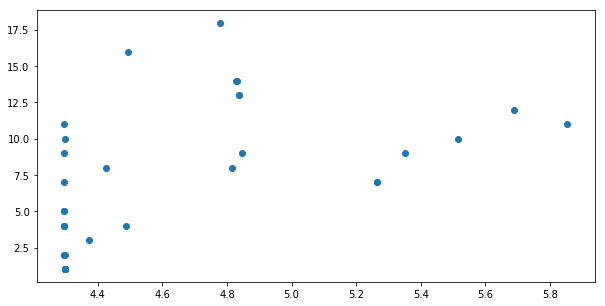

!
-5.8546626460749565
40


/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:41: RuntimeWarning: overflow encountered in true_divide
  return self.func(*[node.calc(x, y) for node in self.nodes])


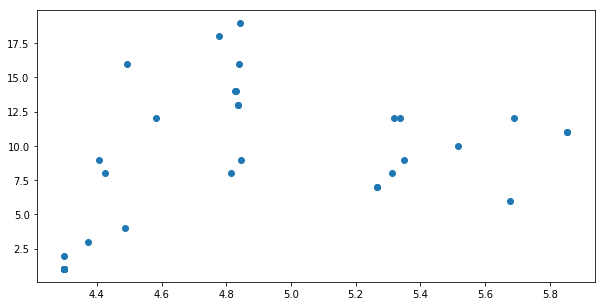

!
-5.8546626460749565
40


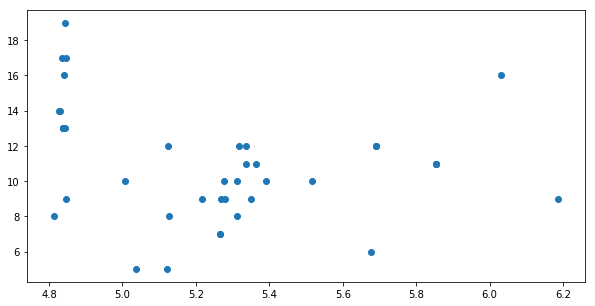

!
-6.185231221145402



In [11]:
np.random.seed(random_seed)

size = 40

population = create_population.create_population(size, 5)

history = []

for iteration in tqdm(range(iterations)):
    new_population = []

    sz = len(population)
    print (sz)

    new_population.append(population[0])

    for i in range(sz // 30):
        new_population.append(mutate_rand_tree(population[0]))
        new_population.append(mutate_rand_tree(population[1]))
        new_population.append(mutate_rand_tree(population[2]))
    for i in range(sz // 10):
        new_population.append(create_random_model(4))
    for i in range(sz):
        t1 = population[np.random.randint(0, sz / 2)]
        t2 = population[np.random.randint(0, sz / 2)]
        new_population.append(mutate_rand_tree(crossfit(t1, t2)))

    population = np.array(list(population) + list(new_population))
    values = rank_population(population, doc_ranks, queries, query_characteristics)
    values = np.array(values)

    indexes = np.arange(len(population))
    
    # тут можно сделать разную регуляризацию
    indexes = sorted(indexes, key=lambda i: -values[i] + max(0, population[i].get_tokens() - 20) * 0.2 + population[i].get_tokens() * 0.005)
    
    population = (population[indexes])[:size]
    values = (values[indexes])[:size]
    
    vis(population, values)
    history.append((population, values))
    
    
    # а тут задетектить стагнацию
    """
    max_dist = 0
    for i in range(10):
        max_dist = max(max_dist, get_second_structural_distance(population[np.random.randint(0, sz)]))
    if max_dist < threshold:
        for i in range(3, sz):
            # create_random_model может сфейлиться, с этим нужно что то сделать
            # get_deep тоже нужно реализовать
            population[i] = create_random_model(population[i].get_deep())
    """
    

    print(-values[0])

In [12]:
reit = []
for models in tqdm(history):
    values = rank_population(models[0], doc_ranks_test, queries_test, query_characteristics_test)
    values = np.array(values)
    reit.append(values)

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:41: RuntimeWarning: invalid value encountered in sqrt
  return self.func(*[node.calc(x, y) for node in self.nodes])


4


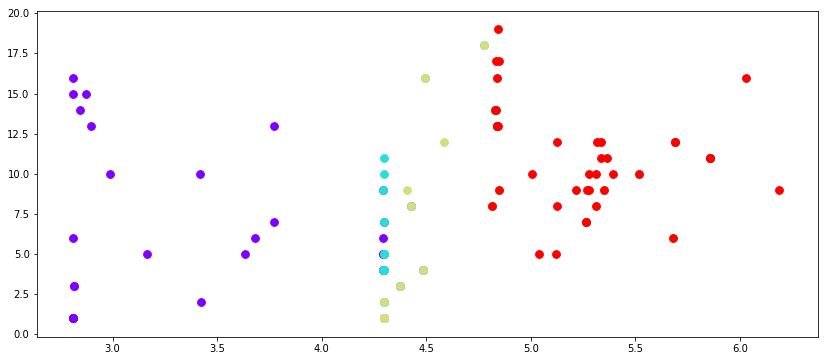

In [15]:
# график сложности
print (len(history))
plt.figure(figsize=(14, 6))

L = 0
R = iterations
s = 60

colors = cm.rainbow(np.linspace(0, 1, iterations))

for i in range(L, R):
    plt.scatter(history[i][1], [p.get_tokens() for p in history[i][0]], c=colors[i], s=s)
    
    
plt.show()

4


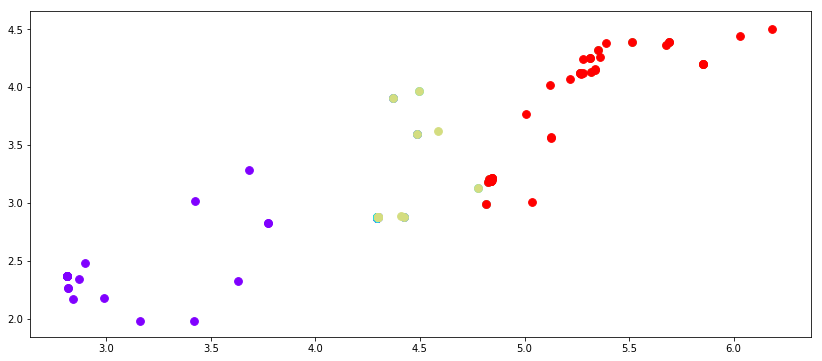

In [16]:
# график score on train / score on val

print (len(history))
plt.figure(figsize=(14, 6))

L = 0
R = iterations
s = 60

colors = cm.rainbow(np.linspace(0, 1, iterations))

for i in range(L, R):
    plt.scatter(history[i][1], reit[i], c=colors[i], s=s)
    
    
plt.show()